In [234]:

# Required Python Packages
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [217]:
# Read the csv file into a pandas DataFrame

starbucks_census = pd.read_csv('Datasets/starbucks_vs_cafe_count.csv')
starbucks_census.head()

,State/Province,Postcode,Starbucks Count,City,Country,Latitude,Longitude,Population,Median Age,Household Income,Per Capita Income,Cafe Count
0,AK,99501.0,2,Anchorage,US,61.22,-149.89,17213.0,38.3,54579.0,39690.0,0
1,AK,99502.0,4,Anchorage,US,61.18,-149.95,23649.0,32.8,87250.0,39021.0,0
2,AK,99503.0,1,Anchorage,US,61.18,-149.88,14107.0,34.0,46819.0,27693.0,0
3,AK,99504.0,5,Anchorage,US,61.23,-149.74,42189.0,31.3,77132.0,31811.0,0
4,AK,99505.0,1,Fort Richardson,US,61.26,-149.68,6479.0,21.6,51582.0,19267.0,0


In [218]:
data = starbucks_census[['State/Province','Starbucks Count','Median Age', 'Cafe Count','Household Income','Per Capita Income', 'Population']]
data.head()

,State/Province,Starbucks Count,Median Age,Cafe Count,Household Income,Per Capita Income,Population
0,AK,2,38.3,0,54579.0,39690.0,17213.0
1,AK,4,32.8,0,87250.0,39021.0,23649.0
2,AK,1,34.0,0,46819.0,27693.0,14107.0
3,AK,5,31.3,0,77132.0,31811.0,42189.0
4,AK,1,21.6,0,51582.0,19267.0,6479.0


In [219]:
data['binned'] = pd.cut(data['Starbucks Count'], bins=[0, 3, 9, 12, 15, float('Inf')], labels=[0, 1, 2,3, 4])
data.head()

C:\Users\lawre\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,State/Province,Starbucks Count,Median Age,Cafe Count,Household Income,Per Capita Income,Population,binned
0,AK,2,38.3,0,54579.0,39690.0,17213.0,0
1,AK,4,32.8,0,87250.0,39021.0,23649.0,1
2,AK,1,34.0,0,46819.0,27693.0,14107.0,0
3,AK,5,31.3,0,77132.0,31811.0,42189.0,1
4,AK,1,21.6,0,51582.0,19267.0,6479.0,0


In [220]:
data.corr()

,Starbucks Count,Median Age,Cafe Count,Household Income,Per Capita Income,Population
Starbucks Count,1.000000,0.066498,NaN,0.187418,0.266557,0.275583
Median Age,0.066498,1.000000,NaN,0.539295,0.572726,0.204977
Cafe Count,NaN,NaN,NaN,NaN,NaN,NaN
Household Income,0.187418,0.539295,NaN,1.000000,0.836472,0.195193
Per Capita Income,0.266557,0.572726,NaN,0.836472,1.000000,0.057544
Population,0.275583,0.204977,NaN,0.195193,0.057544,1.000000


In [221]:
data.describe()

,Starbucks Count,Median Age,Cafe Count,Household Income,Per Capita Income,Population
count,6047.000000,6047.000000,6047.0,6047.000000,6047.000000,6047.000000
mean,2.250207,35.589218,0.0,59982.479246,31317.507028,27501.897801
std,1.903582,11.271898,0.0,30896.145796,17383.674451,17968.908381
min,1.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,1.000000,33.000000,0.0,42815.500000,22136.500000,14710.000000
50%,2.000000,37.200000,0.0,56840.000000,28908.000000,26384.000000
75%,3.000000,41.400000,0.0,76415.500000,38515.000000,37965.500000
max,32.000000,89.500000,0.0,250001.000000,184886.000000,113887.000000


In [222]:
# Assign the data to X and y
# Note: Sklearn requires a 7 x 1 array of values
# so we use reshape to create this

X = data[['Household Income', 'Population', 'Per Capita Income','Median Age', 'Cafe Count']]
y = data['binned']

print("Shape: ", X.shape, y.shape)

Shape:  (6047, 5) (6047,)


In [223]:
def random_forest_classifier(features, target):
    """
    To train the random forest classifier with features and target data
    :param features:
    :param target:
    :return: trained random forest classifier
    """
    clf = RandomForestClassifier()
    clf.fit(features, target)
    return clf

In [224]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [225]:
    # Create random forest classifier instance
    trained_model = random_forest_classifier(X_train, y_train)
    print ("Trained model :: ", trained_model)

 

Trained model ::  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [226]:
# Create random forest classifier instance
trained_model = random_forest_classifier(X_train, y_train)

print ("Trained model :: ", trained_model)
predictions = trained_model.predict(X_test)
 


print ("Actual outcome :: {} and Predicted outcome :: {}".format(list(X_test), predictions))


Trained model ::  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Actual outcome :: ['Household Income', 'Population', 'Per Capita Income', 'Median Age', 'Cafe Count'] and Predicted outcome :: [0 0 0 ..., 0 0 0]


# PREDICTIONS

In [227]:
# Create random forest classifier instance
trained_model = random_forest_classifier(X_train, y_train)

print ("Trained model :: ", trained_model)
predictions = trained_model.predict(X_test)
 


print ("Actual outcome :: {} and Predicted outcome :: {}".format(list(y_test), predictions))


Trained model ::  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Actual outcome :: [0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

# ACCURACY CALCULATIONS

In [228]:
# Create random forest classifier instance
trained_model = random_forest_classifier(X_train, y_train)
print ("Trained model :: ", trained_model)
predictions = trained_model.predict(X_train)
 
# Train and Test Accuracy
print ("Train Accuracy :: ", accuracy_score(y_train, trained_model.predict(X_train)))
#print (int("Test Accuracy  :: ", accuracy_score(y_test, predictions)))

Trained model ::  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Train Accuracy ::  0.97618522602


# FIT METHOD 

In [229]:
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.83531746031746035

In [230]:
sorted(zip(rf.feature_importances_, X.columns), reverse=True)

[(0.29032449732624055, 'Population'),
 (0.26714228248478, 'Per Capita Income'),
 (0.2368331077346108, 'Household Income'),
 (0.20570011245436856, 'Median Age'),
 (0.0, 'Cafe Count')]

# Confusion Matrix
A confusion matrix is a technique for summarizing the performance of a classification algorithm.
it is also a summary of prediction results on a classification problem.
The number of correct and incorrect predictions are summarized with count values and broken down by each class

In [231]:
# Create random forest classifier instance
trained_model = random_forest_classifier(X_train, y_train)
predictions = trained_model.predict(X_test)
 
print ("Train Accuracy :: ", accuracy_score(y_train, trained_model.predict(X_train)))
print ("Test Accuracy  :: ", accuracy_score(y_test, predictions))
print (" Confusion matrix ", confusion_matrix(y_test, predictions))

Train Accuracy ::  0.978169790518
Test Accuracy  ::  0.828703703704
 Confusion matrix  [[1206   48    0    0    0]
 [ 198   47    0    0    0]
 [   3    7    0    0    0]
 [   0    1    0    0    0]
 [   1    1    0    0    0]]


# MEAN SQUARED ERROR(MSE)

In [236]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

# Use our model to predict a value
predicted = trained_model.predict(X)

# Score the prediction with mse and r2
mse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 0.07144038366131966
R-squared (R2 ): 0.6171386998417729


# K_NEAREST NEIGHBOR

k: 1, Train/Test Score: 0.998/0.761
k: 3, Train/Test Score: 0.874/0.810
k: 5, Train/Test Score: 0.857/0.823
k: 7, Train/Test Score: 0.853/0.828
k: 9, Train/Test Score: 0.847/0.832
k: 11, Train/Test Score: 0.843/0.833
k: 13, Train/Test Score: 0.841/0.835
k: 15, Train/Test Score: 0.840/0.837
k: 17, Train/Test Score: 0.838/0.837
k: 19, Train/Test Score: 0.836/0.837


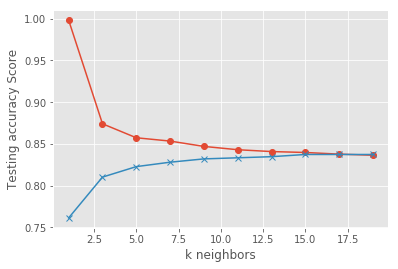

In [245]:
from sklearn.neighbors import KNeighborsClassifier
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()